In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy
from scipy import stats
from scipy.signal import find_peaks

array([1.01713, 1.16516, 1.30842, 1.45168, 1.59971, 1.75729, 1.90055,
       2.07724])

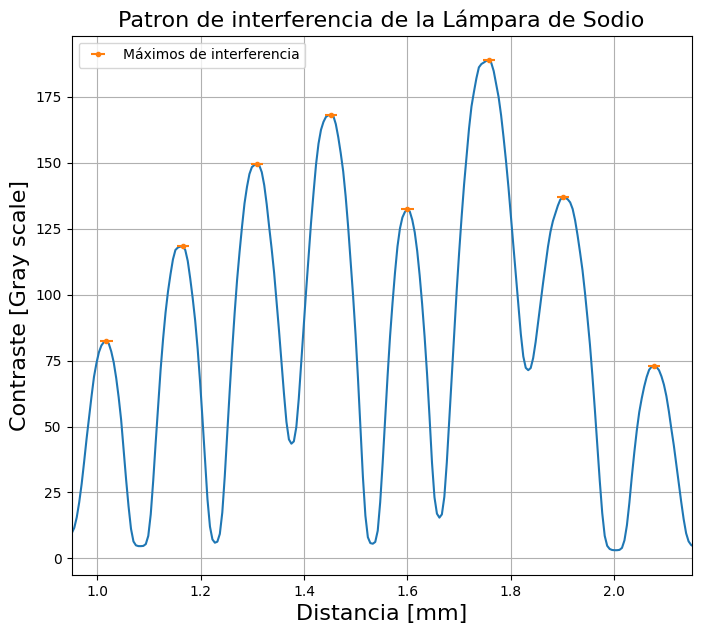

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtNTjq9YOCWz21h6_xHPfmHjONskVFFj3-aOz3nAOuwUFzA2SGcjKKEi7lJ1RkZfa5hycK3WjP9O_P/pub?gid=360430845&single=true&output=csv"
datos = pd.read_csv(gsheet,decimal='.')
x = datos['Distance_(mm)'].to_numpy()
I = datos['Gray_Value'].to_numpy()

max, _ = find_peaks(I, 15)
max=max[7:-2]
#max = max[1:]
x_max_err=np.diff(x)[0]*2.5

plt.figure(figsize=(8,7))
plt.plot(x,I)
plt.errorbar(x[max], I[max], xerr=x_max_err, fmt='.', label='Máximos de interferencia')
plt.xlim(0.95,2.15)
plt.title('Patron de interferencia de la Lámpara de Sodio', fontsize=16)
plt.xlabel('Distancia [mm]', fontsize=16)
plt.ylabel('Contraste [Gray scale]', fontsize=16)
plt.grid()
plt.legend()
x[max]

In [ ]:
y = np.diff(x[max])
interf = np.mean(y)
interf_err = np.std(y)
print(interf, interf_err)

0.15144428571428573 0.011334242500547903


In [ ]:
def lineal(x, a, b):
  return a*x+b

(None, <matplotlib.legend.Legend at 0x7d1057dbb160>)

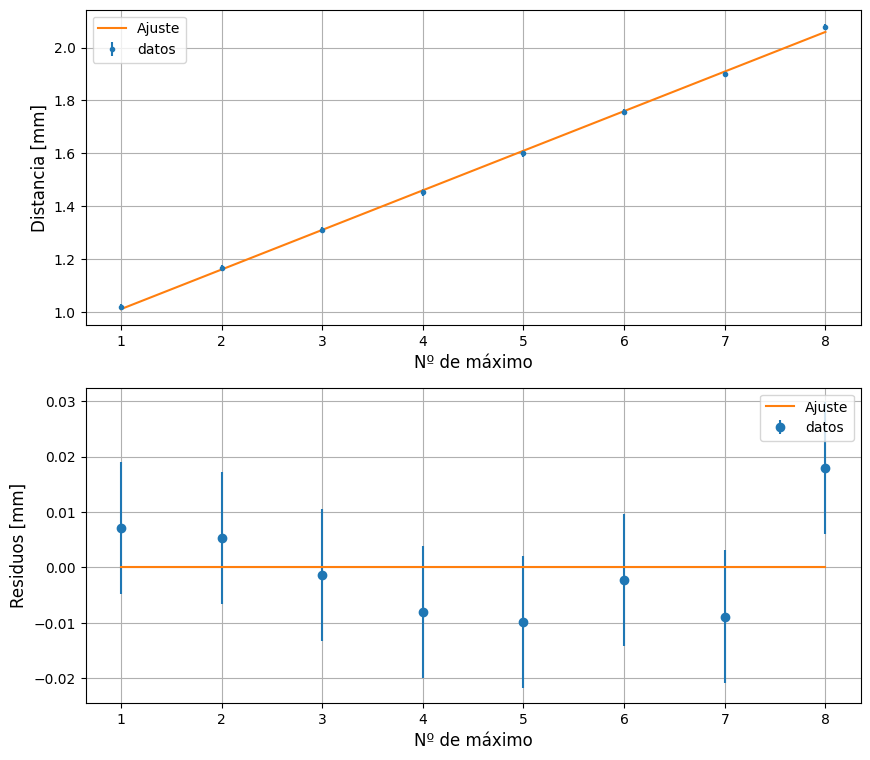

In [ ]:
m = np.linspace(1, 8, 8)

params, cov = curve_fit(lineal, m, x[max], sigma=x_max_err*np.ones(len(m)), absolute_sigma=True)
err = np.sqrt(np.diag(cov))
x_fit = lineal(m, params[0], params[1])

plt.figure(figsize=(10,9))
ax1 = plt.subplot(2,1,1)
plt.errorbar(m, x[max], yerr=x_max_err, fmt='.', label='datos')
plt.plot(m, x_fit, label = 'Ajuste')
plt.xlabel('Nº de máximo',fontsize=12)
plt.ylabel('Distancia [mm]',fontsize=12)
plt.grid(), plt.legend()

params, err

plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(m, x[max]-x_fit, yerr=x_max_err, fmt='o', label='datos')
plt.plot(m, x_fit - x_fit, label = 'Ajuste')
plt.xlabel('Nº de máximo', fontsize=12)
plt.ylabel('Residuos [mm]',fontsize=12)
plt.grid(), plt.legend()

In [ ]:
#Metricas de bondad
from scipy.stats import pearsonr
rp = pearsonr(m, x[max])[0]
chi2 = scipy.stats.chisquare(f_obs=x[max], f_exp=x_fit)
corr_matrix = np.corrcoef(x[max], x_fit)
corr = corr_matrix[0,1]
R_sq = corr**2

rp, chi2, R_sq
print(f"resultado: Coeficiente de Pearson = ({rp:.4f})")
print(f"resultado: Coeficiente de correlación = ({R_sq:.4f})")
print(chi2)


resultado: Coeficiente de Pearson = (0.9997)
resultado: Coeficiente de correlación = (0.9993)
Power_divergenceResult(statistic=0.000380888713518983, pvalue=0.9999999999999918)


Text(0.5, 0, '$\\lambda$ (nm)')

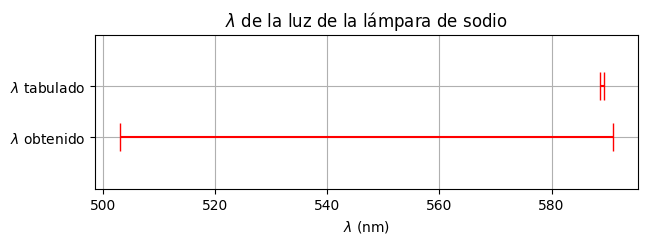

In [ ]:
#Grafico comparativo
lambdaa, err_lambda= 547, 22
lambda_tab, err_lambdatab= 589, 0.3


plt.figure(figsize=(7,2))
plt.errorbar(x=lambdaa, y=1, xerr=err_lambda*2, capsize=10,color='red')
plt.errorbar(x=lambda_tab, y=2, xerr=err_lambdatab, capsize=10,color='red')
#plt.plot(lambda_tab,2, marker="o", color="red")

plt.title(r"$\lambda$ de la luz de la lámpara de sodio")
plt.grid()
plt.ylim(0, 3)
plt.yticks([1, 2], [r"$\lambda$ obtenido", r"$\lambda$ tabulado"])
plt.xlabel(r"$\lambda$ (nm)")


<Axes: >

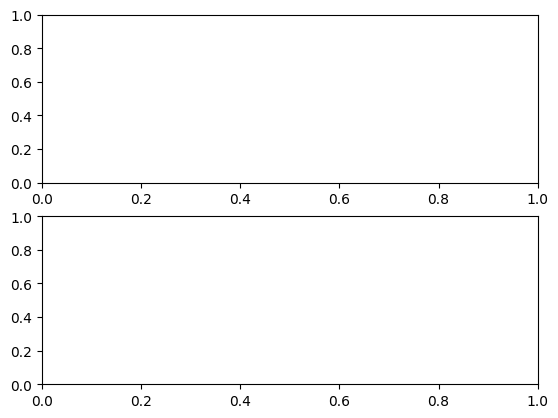

In [ ]:
ax1 = plt.subplot(2,1,1)
plt.subplot(2,1,2, sharex=ax1)

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSHaVZdY9nkBuH5la8PGvO0Vj9y9BOKBBgSWhGkZBE-f-lejRNdya1giWPpb0PnHDm_zMyebExR8O7H/pub?gid=1994008213&single=true&output=csv"
datos = pd.read_csv(gsheet,decimal='.')
x = datos['Distamce_(mm)'].to_numpy()
I = datos['Gray_Value'].to_numpy()

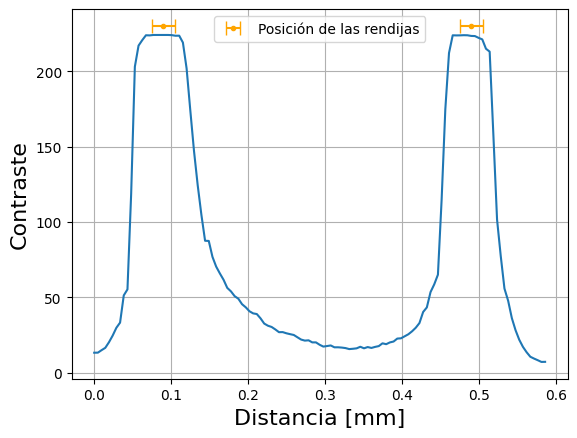

In [ ]:
plt.figure()
plt.plot(x,I)
plt.errorbar(0.09, 230, xerr=0.015, fmt='.', capsize=5, label='Posición de las rendijas', color='orange')
plt.errorbar(0.49, 230, xerr=0.015, fmt='.',capsize=5, color='orange')
plt.xlabel('Distancia [mm]', fontsize=16)
plt.ylabel('Contraste', fontsize=16)
plt.grid()
plt.legend()